# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Business Problem

SyriaTel, a telecommunications company, is interested in knowing the important factors in determining whether or not a customer will stay with the company. Using customer account data, this notebook will provide classification models aimed at predicting churn.   

# Load Data

In [38]:
df = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [39]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# Data Cleaning

In [41]:
updated_columns = []
for c in df.columns:
    updated_columns.append(c.replace(' ', '_'))
df.columns = updated_columns
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [42]:
#Convert area_code column to object 
df['area_code'] = df.area_code.astype(object)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   object 
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

## Data Exploration

In [43]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

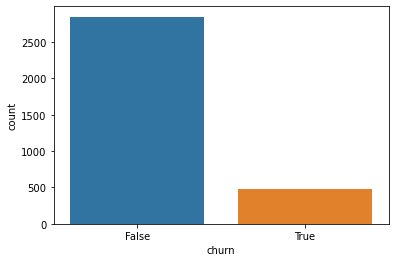

In [9]:
sns.countplot(x='churn', data=df)

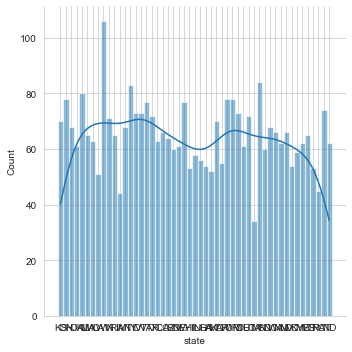

In [10]:
sns.set_style('whitegrid')
sns.displot(x=df['state'],kind='hist',kde=True);

In [12]:
df.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

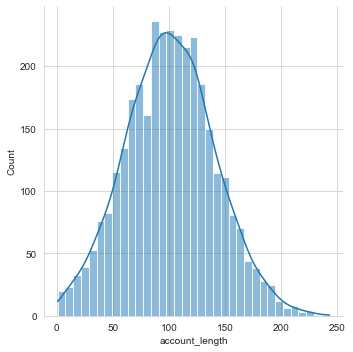

In [13]:
sns.displot(x=df['account_length'],kind='hist', kde=True);

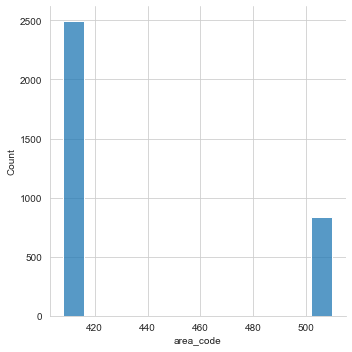

In [14]:
sns.displot(x=df['area_code'],kind='hist');

In [15]:
df.area_code.unique()

array([415, 408, 510], dtype=object)

In [16]:
df.area_code.value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

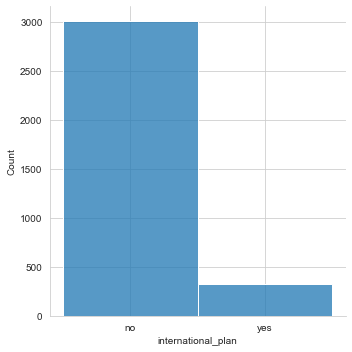

In [17]:
sns.displot(x=df['international_plan'],kind='hist');

<AxesSubplot:xlabel='churn', ylabel='count'>

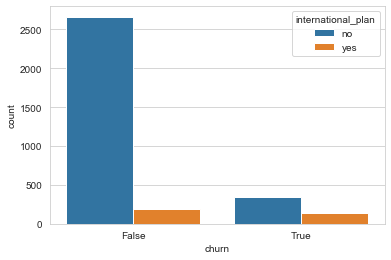

In [18]:
sns.countplot(x='churn', hue='international_plan', data=df)

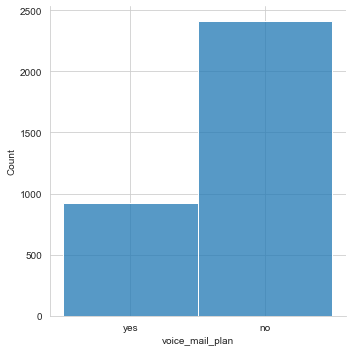

In [19]:
sns.displot(x=df['voice_mail_plan'],kind='hist');

<AxesSubplot:xlabel='churn', ylabel='count'>

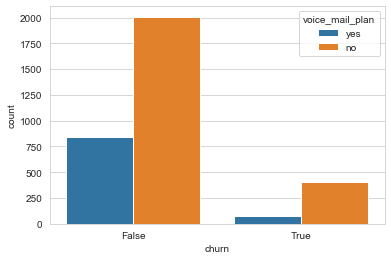

In [20]:
sns.countplot(x='churn', hue='voice_mail_plan', data=df)

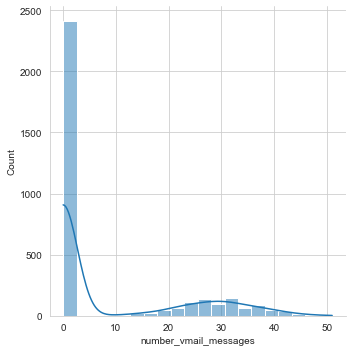

In [21]:
sns.displot(x=df['number_vmail_messages'],kind='hist',kde=True);

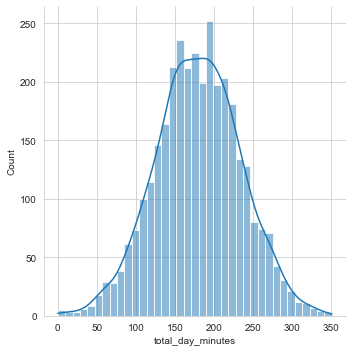

In [22]:
sns.displot(x=df['total_day_minutes'],kind='hist',kde=True);

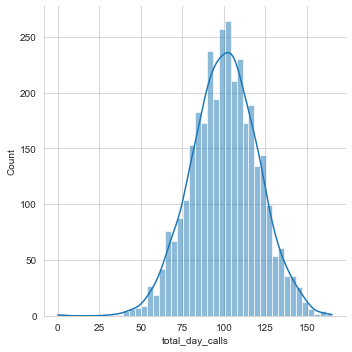

In [23]:
sns.displot(x=df['total_day_calls'],kind='hist',kde=True);

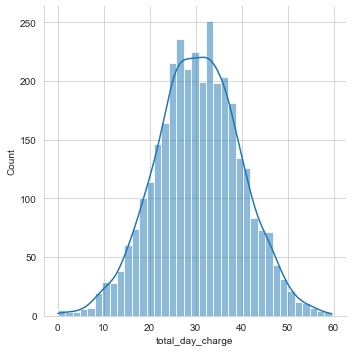

In [24]:
sns.displot(x=df['total_day_charge'],kind='hist',kde=True);

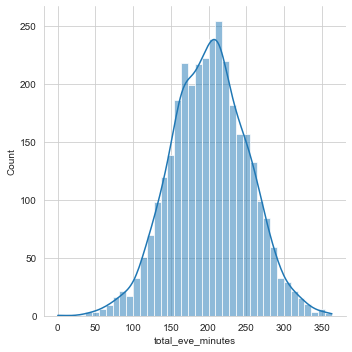

In [25]:
sns.displot(x=df['total_eve_minutes'],kind='hist',kde=True);

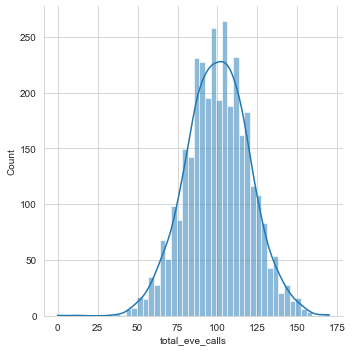

In [26]:
sns.displot(x=df['total_eve_calls'],kind='hist',kde=True);

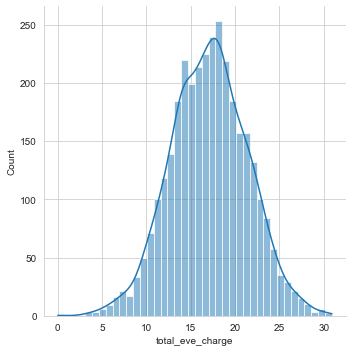

In [27]:
sns.displot(x=df['total_eve_charge'],kind='hist',kde=True);

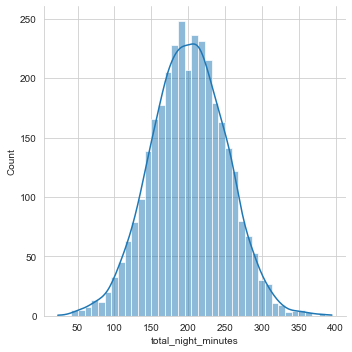

In [28]:
sns.displot(x=df['total_night_minutes'],kind='hist',kde=True);

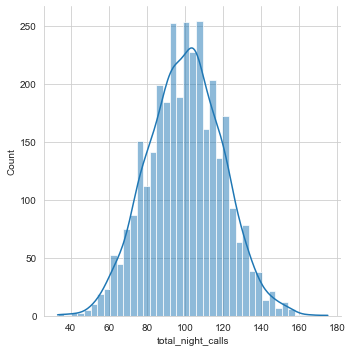

In [29]:
sns.displot(x=df['total_night_calls'],kind='hist',kde=True);

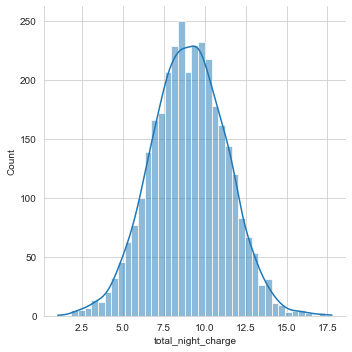

In [30]:
sns.displot(x=df['total_night_charge'],kind='hist',kde=True);

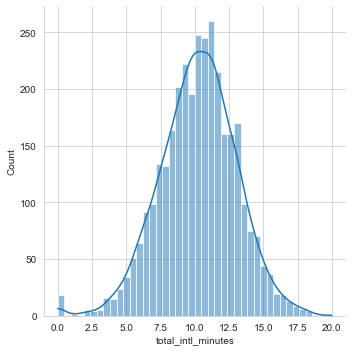

In [31]:
sns.displot(x=df['total_intl_minutes'],kind='hist',kde=True);

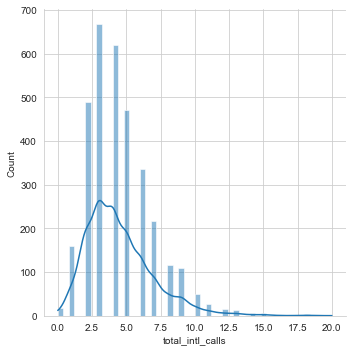

In [32]:
sns.displot(x=df['total_intl_calls'],kind='hist',kde=True);

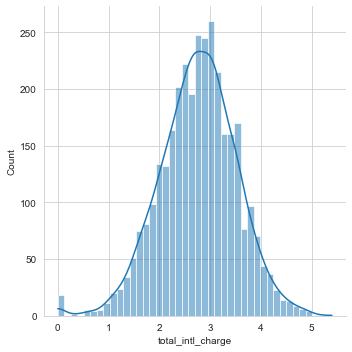

In [33]:
sns.displot(x=df['total_intl_charge'],kind='hist',kde=True);

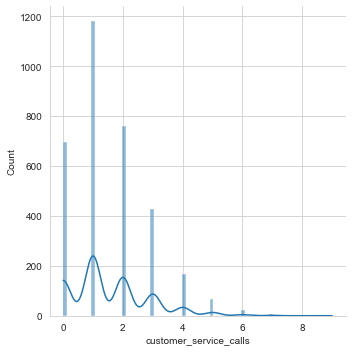

In [34]:
sns.displot(x=df['customer_service_calls'],kind='hist',kde=True);

## Pivot Table - Feature Averages

In [35]:
pd.pivot_table(df, index='churn', values=['account_length', 'number_vmail_messages', 'total_day_minutes',
                                                  'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                                                  'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
                                                  'total_night_calls', 'total_night_charge', 'total_intl_minutes',
                                                  'total_intl_calls', 'total_intl_charge', 'customer_service_calls'])

,account_length,customer_service_calls,number_vmail_messages,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes
churn,,,,,,,,,,,,,,,
False,100.793684,1.449825,8.604561,100.283158,29.780421,175.175754,100.038596,16.918909,199.043298,4.532982,2.743404,10.158877,100.058246,9.006074,200.133193
True,102.664596,2.229814,5.115942,101.335404,35.175921,206.914079,100.561077,18.054969,212.410145,4.163561,2.889545,10.700000,100.399586,9.235528,205.231677


## Check for Multicollinearity

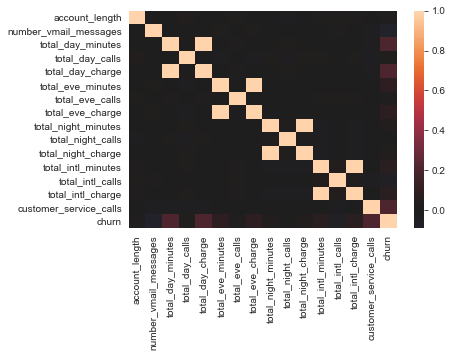

In [56]:
#Create heatmap to check for highly correlated features.
sns.heatmap(df.corr(), center=0);

 -  total_day_charge, total_day_calls, and total_day_minutes are highly correlated.

 - total_eve_charge, total_eve_calls, and total_eve_minutes are highly correlated.

 - total_night_charge, total_night_calls, and total_night_minutes are highly correlated.

 - total_intl_charge, total_intl_calls, and total_intl_minutes are highly correlated.
 
 > - Will need to seperate these features when building models to prevent multicollinearity.

## Drop Columns

In [48]:
df_filtered = df.drop(['area_code', 'phone_number'], axis=1)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   international_plan      3333 non-null   object 
 3   voice_mail_plan         3333 non-null   object 
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

## Feature Engineering

In [49]:
total_charge = df_filtered['total_day_charge'] + df_filtered['total_eve_charge'] + df_filtered['total_night_charge'] + df_filtered['total_intl_charge']
df_filtered['total_charge'] = total_charge
df_filtered.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


In [50]:
pd.pivot_table(df_filtered, index='churn', values='total_charge')

,total_charge
churn,
False,58.448807
True,65.355963


## Split Data into Training and Testing sets

In [51]:
X = df_filtered.drop(['churn'], axis=1)
y = df_filtered['churn']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2499, 19), (834, 19), (2499,), (834,))

## Convert Categorical Features

In [72]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train)

OneHotEncoder(handle_unknown='ignore')

In [75]:
X_train_ohe = ohe.transform(X_train)

In [76]:
X_test_ohe = ohe.transform(X_test)

## Label Encoding

# Modeling

## Model A - Statsmodel

In [49]:
scaler_a = preprocessing.StandardScaler().fit(X_train_a)
scaler_a

StandardScaler()

In [50]:
X_scaled_train_a = scaler_a.transform(X_train_a)

In [51]:
X_scaled_test_a = scaler_a.transform(X_test_a)

In [53]:
X = sm.add_constant(X_scaled_train_a)
logit_model=sm.Logit(y_train_a, X)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.327015
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   True   No. Observations:                 2499
Model:                          Logit   Df Residuals:                     2489
Method:                           MLE   Df Model:                            9
Date:                Wed, 14 Apr 2021   Pseudo R-squ.:                  0.2040
Time:                        09:43:32   Log-Likelihood:                -817.21
converged:                      False   LL-Null:                       -1026.7
Covariance Type:            nonrobust   LLR p-value:                 1.252e-84
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2726      0.080    -28.298      0.000      -2.430      -2.115
x1             0.0190      0.065      0.293      0.769      -0.10

/Users/justing/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Model B - Logistic Regression Model

In [54]:
features_b = df_updated_2.drop(['churn', 'area_code'], axis=1)
target_b = pd.get_dummies(df_updated_2['churn'], drop_first=True, dtype=float)

In [55]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(features_b, target_b, random_state=42)

In [56]:
scaler_b = preprocessing.StandardScaler().fit(X_train_b)
scaler_b

StandardScaler()

In [57]:
X_scaled_train_b = scaler_b.transform(X_train_b)

In [58]:
X_scaled_test_b = scaler_b.transform(X_test_b)

In [59]:
model_b = LogisticRegression(solver='liblinear', class_weight='balanced')

In [60]:
model_b.fit(X_scaled_train_b, y_train_b.values.ravel())

LogisticRegression(class_weight='balanced', solver='liblinear')

In [61]:
model_b.coef_

array([[ 0.04592608,  0.24467874,  0.31610039,  0.14471429,  0.08088134,
         0.18015806,  0.77351466,  0.71591678, -0.60363199,  0.36993991]])

In [62]:
model_b.predict_proba(X_scaled_test_b)

array([[0.54417241, 0.45582759],
       [0.88885114, 0.11114886],
       [0.86582763, 0.13417237],
       ...,
       [0.8437516 , 0.1562484 ],
       [0.87272465, 0.12727535],
       [0.84962706, 0.15037294]])

In [63]:
y_pred_b = model_b.predict(X_scaled_test_b)

In [64]:
conf_mx = confusion_matrix(y_test_b, y_pred_b)
conf_mx

array([[559, 150],
       [ 25, 100]])

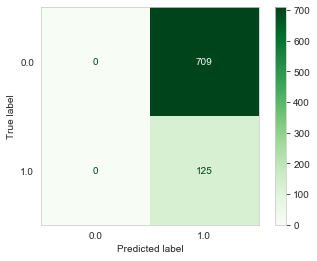

In [65]:
plot_confusion_matrix(model_b, X_test_b, y_test_b, cmap='Greens')
plt.grid(False)

In [66]:
print(classification_report(y_test_b, model_b.predict(X_test_b)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       709
         1.0       0.15      1.00      0.26       125

    accuracy                           0.15       834
   macro avg       0.07      0.50      0.13       834
weighted avg       0.02      0.15      0.04       834



/Users/justing/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
y_score = model_b.fit(X_train_b, y_train_b.values.ravel()).decision_function(X_test_b)

fpr, tpr, thresholds = roc_curve(y_test_b, y_score)

In [69]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.836332863187588


AUC: 0.836332863187588


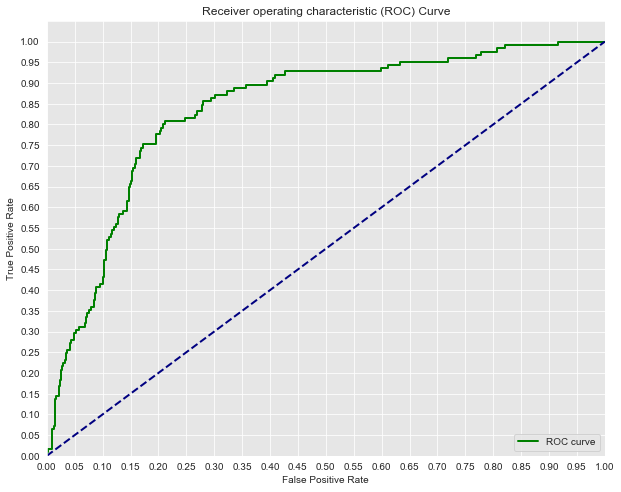

In [100]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Model C - Decesion Tree

In [71]:
features_c = df_updated_2.drop(['churn', 'area_code'], axis=1)
target_c = pd.get_dummies(df_updated_2['churn'], drop_first=True, dtype=float)

In [72]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    features_c, target_c, random_state=42)

In [86]:
model_c = DecisionTreeClassifier(max_depth=3, random_state=10)  
model_c.fit(X_train_c, y_train_c) 

DecisionTreeClassifier(max_depth=3, random_state=10)

In [87]:
y_pred_c = model_c.predict(X_test_c) 

In [88]:
acc = accuracy_score(y_test_c ,y_pred_c) * 100
print('Accuracy is :{0}'.format(acc))

Accuracy is :95.32374100719424


In [89]:
print('Confusion Matrix:')
cnf_matrix = confusion_matrix(y_test_c, y_pred_c)
print(cnf_matrix)

Confusion Matrix:
[[708   1]
 [ 38  87]]


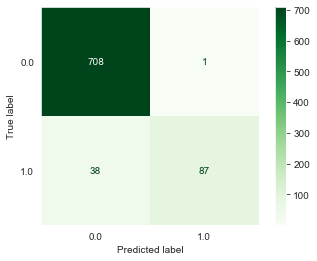

In [90]:
plot_confusion_matrix(model_c, X_test_c, y_test_c, cmap=plt.cm.Greens)
plt.grid(False)

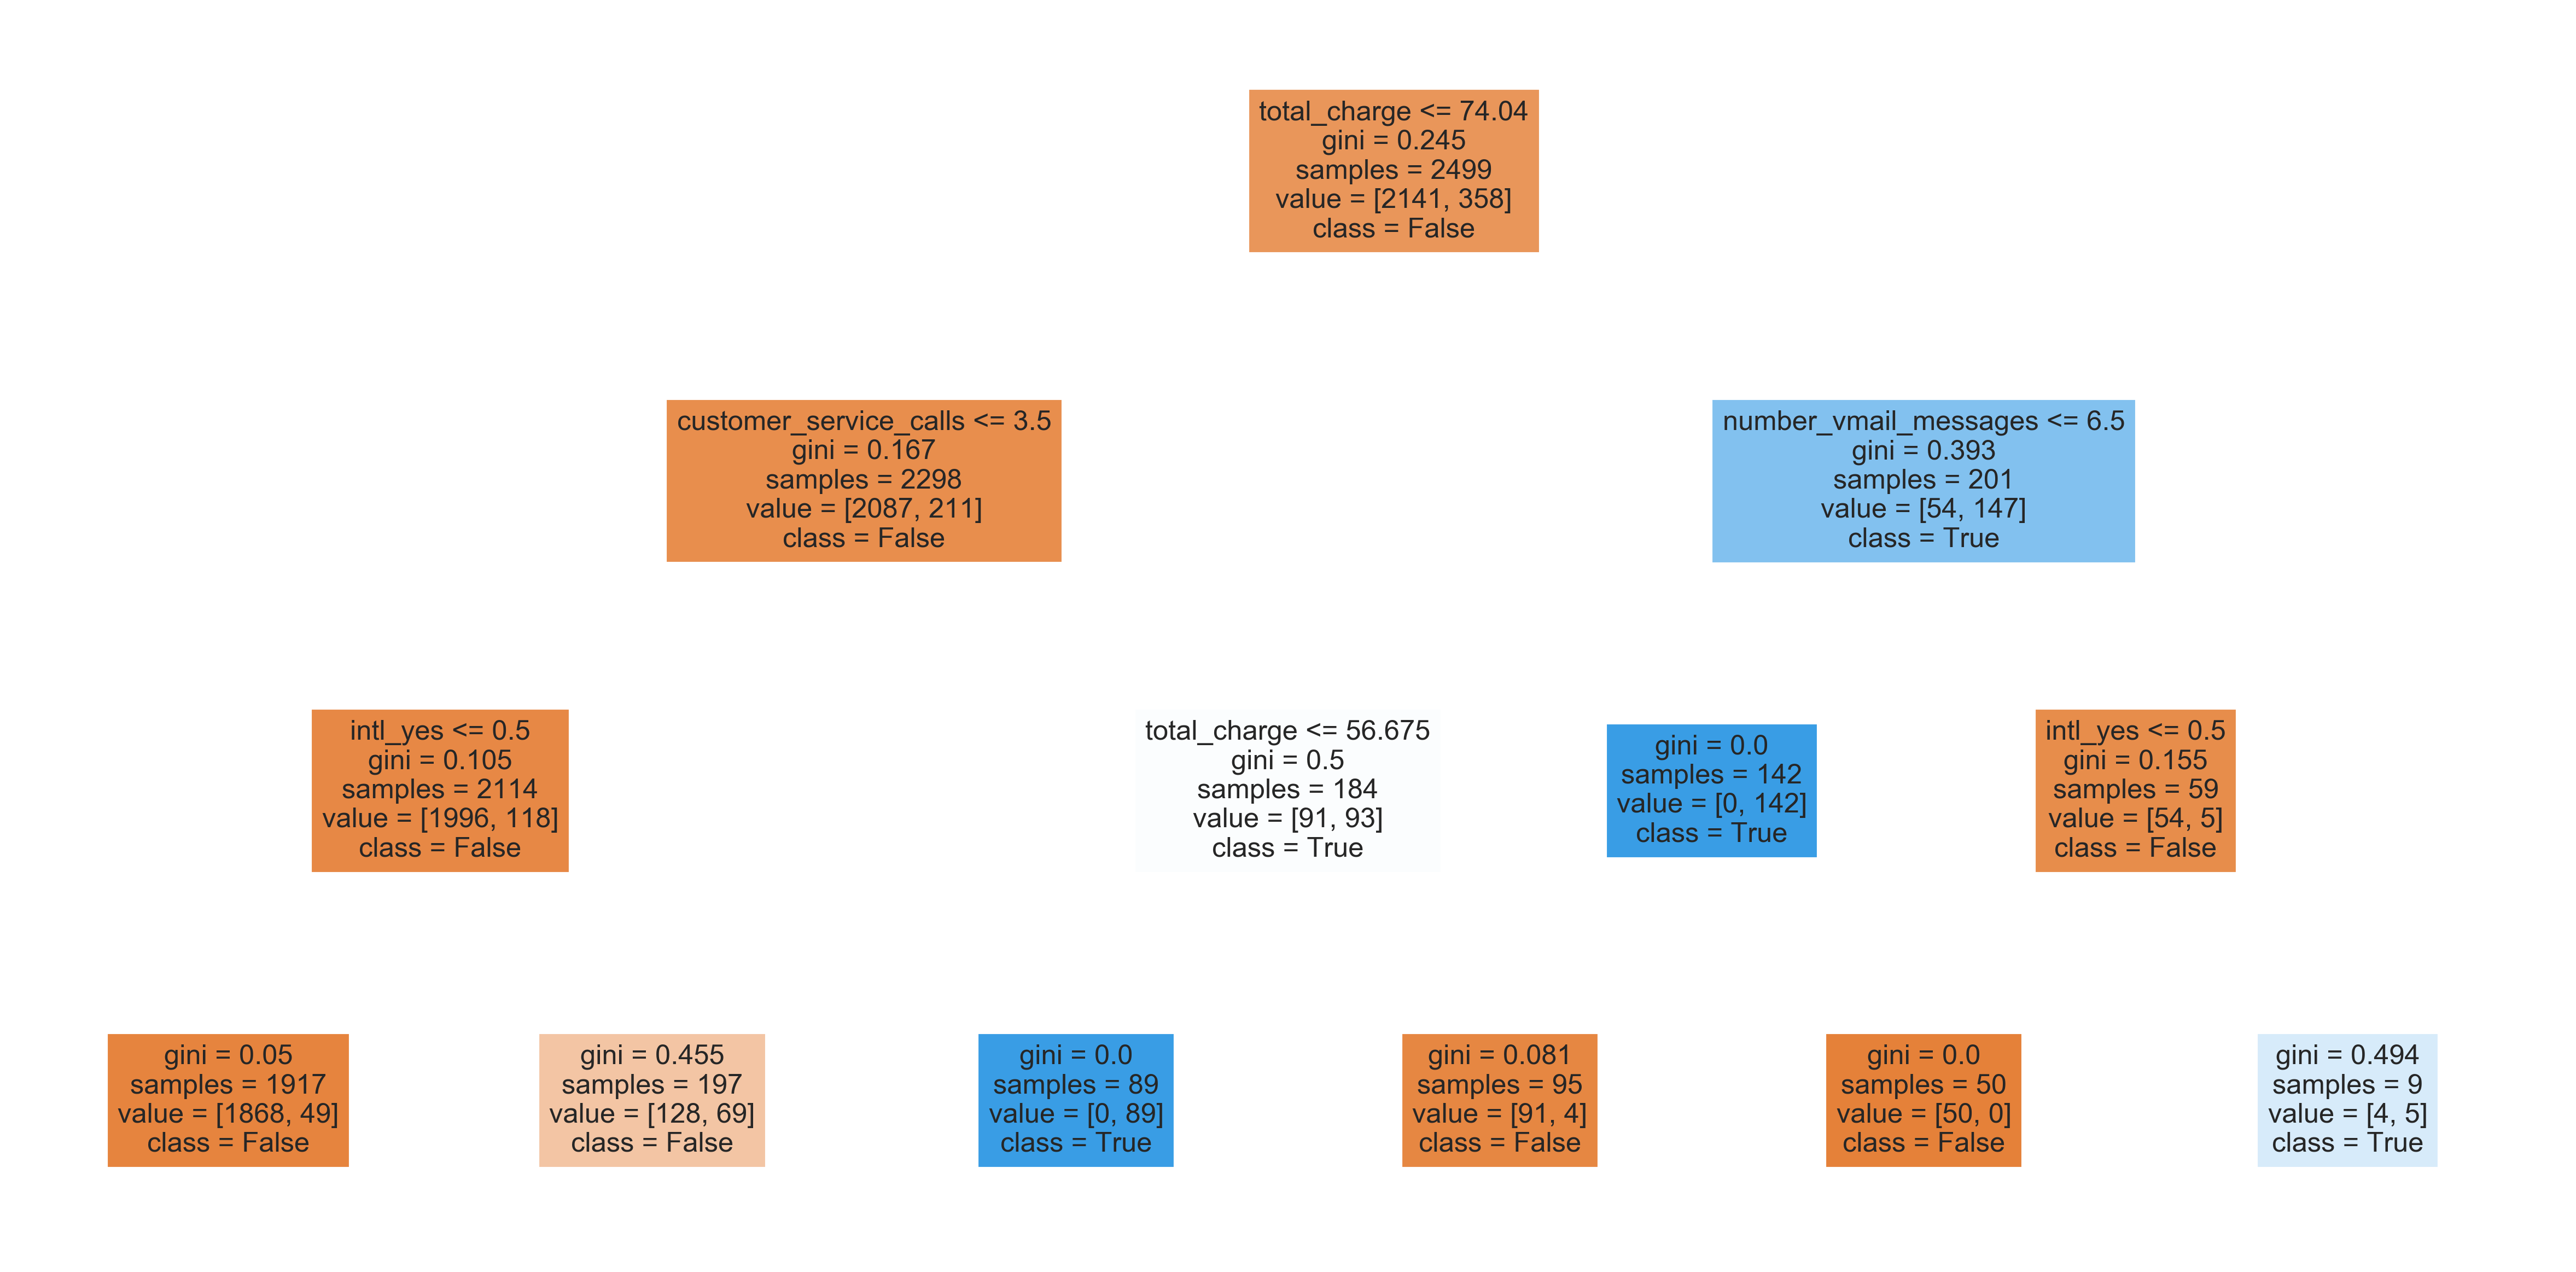

In [96]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (20,10), dpi=300)
tree.plot_tree(model_c,
               feature_names = features_c.columns, 
               class_names=np.unique(df_updated_2['churn']).astype('str'),
               filled = True)
plt.show()

In [92]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_c, y_pred_c)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.85


In [93]:
classifier_2 = DecisionTreeClassifier(max_depth=3, random_state=10, criterion='entropy')  
classifier_2.fit(X_train_c, y_train_c)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

In [ ]:
from pydotplus import graph_from_dot_data

## Model D - Random Forest

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df_updated_2.drop(['churn', 'area_code'], axis=1), 
                                                    df_updated_2['churn'], random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2499, 10), (834, 10), (2499,), (834,))

In [102]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

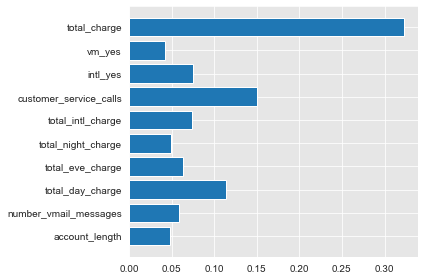

In [103]:
fig, ax = plt.subplots()

ax.barh(width=forest.feature_importances_, y=X_train.columns)
fig.tight_layout()

In [104]:
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

In [105]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       709
        True       0.98      0.78      0.87       125

    accuracy                           0.97       834
   macro avg       0.97      0.89      0.93       834
weighted avg       0.97      0.97      0.96       834



## Model E - Support Vector Machine